In [259]:
topdir_obiwan_out='/global/cscratch1/sd/adematti/legacysim/dr9/'
name_for_run='ebv1000shaper'
rs_type='file0_rs0_skip0'
region='north'
band = 'z'
idx=3

In [248]:
%pylab inline
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import os

Populating the interactive namespace from numpy and matplotlib


In [249]:
summary_north = fits.getdata('/global/cscratch1/sd/adematti/legacysim/dr9/ebv1000shaper/north/file0_rs0_skip0/merged/matched_input.fits')
summary_south = fits.getdata('/global/cscratch1/sd/adematti/legacysim/dr9/ebv1000shaper/north/file0_rs0_skip0/merged/matched_input.fits')

In [250]:
if region is 'north':
    summary=summary_north
    sel = ~summary['matched'] 
    #sel = summary['matched'] 
    brickname = summary[sel]['input_brickname'][idx]
else:
    summary=summary_south
    sel = ~summary['matched']
    #sel = summary['matched'] 
    brickname = summary[sel]['input_brickname'][idx]
    
print(brickname)

2593p612


In [251]:

topdir = topdir_obiwan_out+\
name_for_run+'/'+region+'/'+rs_type

fn = os.path.join(topdir,'coadd',brickname[:3],brickname,'legacysurvey-'+brickname+'-image-'+band+'.fits.fz')

coadd = fits.getdata(fn)

In [252]:
fn = os.path.join(topdir,'tractor',brickname[:3],'tractor-'+brickname+'.fits')

tractor = fits.getdata(fn)

In [253]:
fn = os.path.join(topdir,'coadd',brickname[:3],brickname,'legacysurvey-'+brickname+'-model-'+band+'.fits.fz')

model = fits.getdata(fn)

In [254]:
fn = os.path.join(topdir,'sim',brickname[:3],'injected-'+brickname+'.fits')
sim = fits.getdata(fn)

In [255]:
#sim image is missing
#fn = os.path.join(topdir,'coadd',brickname[:3],brickname,'legacysurvey-'+brickname+'-sims-'+band+'.fits.fz')
#sim_img = fits.getdata(fn)
from PIL import Image
fn = os.path.join(topdir,'coadd',brickname[:3],brickname,'legacysurvey-'+brickname+'-simscoadd.jpg')
if band =='g':
    sim_img = plt.imread(fn).transpose()[0].transpose()
if band =='r':
    sim_img = plt.imread(fn).transpose()[1].transpose()
if band =='z':
    sim_img = plt.imread(fn).transpose()[2].transpose()


In [256]:
fn = '/global/project/projectdirs/cosmo/data/legacysurvey/dr9/'+region+'/coadd/'+\
brickname[:3]+'/'+brickname+'/legacysurvey-'+brickname+'-image-'+band+'.fits.fz'

tractor_origin = fits.getdata(fn)

5.07409


"\nplt.subplot(3,2,5)\nx_cen = int(bx)\ny_cen = int(by)\ndat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]\nplt.imshow(dat)\nplt.xlabel('real-sim (true) image(%.2f %.3f %.3f)'%(dat.sum(),dat.max(),dat.min()))\nprint(dat.sum())\nprint(dat.max()-dat.min())\n\nplt.subplot(3,2,6)\np=plt.hist(dat.ravel(),bins=20)\nplt.xlabel('real - sim pixels, mean:%f' %dat.mean())\nsim_bad = sim_matched[bad_source_idx]\nprint(sim_bad['gflux'][i],tractor_bad['flux_g'][i])\nprint(sim_bad['rhalf'][i],sim_bad['e2'][i]**2+sim_bad['e1'][i]**2)\nprint(tractor_bad['shapeexp_r'][i],tractor_bad['shapeexp_e1'][i]**2+tractor_bad['shapeexp_e2'][i]**2)\n"

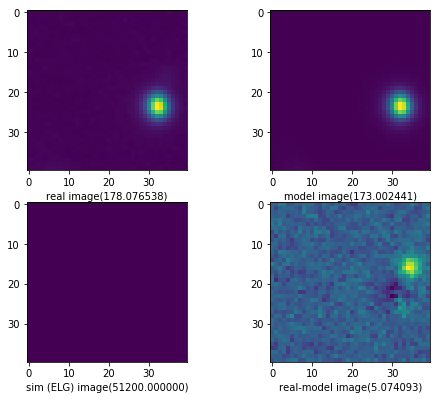

In [257]:
bx = summary[sel]['input_bx'][idx]
by = summary[sel]['input_by'][idx]
radius = 20

plt.figure(figsize = (8,10))
plt.subplot(3,2,1)
x_cen = int(bx)
y_cen = int(by)
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('real image(%f)'%dat.sum())

plt.subplot(3,2,2)
x_cen = int(bx)
y_cen = int(by)
dat = model[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('model image(%f)'%dat.sum())

plt.subplot(3,2,3)
y_cen = int(by)
x_cen = int(bx)
dat = sim_img.transpose()[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('sim (ELG) image(%f)'%dat.sum())
plt.subplot(3,2,4)

x_cen = int(bx)
y_cen = int(by)
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
model[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
print(dat.sum())
plt.xlabel('real-model image(%f)'%dat.sum())
'''
plt.subplot(3,2,5)
x_cen = int(bx)
y_cen = int(by)
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
sim_img[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('real-sim (true) image(%.2f %.3f %.3f)'%(dat.sum(),dat.max(),dat.min()))
print(dat.sum())
print(dat.max()-dat.min())

plt.subplot(3,2,6)
p=plt.hist(dat.ravel(),bins=20)
plt.xlabel('real - sim pixels, mean:%f' %dat.mean())
sim_bad = sim_matched[bad_source_idx]
print(sim_bad['gflux'][i],tractor_bad['flux_g'][i])
print(sim_bad['rhalf'][i],sim_bad['e2'][i]**2+sim_bad['e1'][i]**2)
print(tractor_bad['shapeexp_r'][i],tractor_bad['shapeexp_e1'][i]**2+tractor_bad['shapeexp_e2'][i]**2)
'''

In [258]:
!pwd

/global/u2/h/huikong/obiwan_codes/obiwan_Aug/obiwan_code/py/ipynb
